<a href="https://colab.research.google.com/github/Labdhiiii/GIT-Learning/blob/master/Time_Series_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series

https://youtu.be/94PlBzgeq90?si=1CHGO989_b8SsTl-

https://medium.com/@wainaina.pierre/the-complete-guide-to-time-series-forecasting-models-ef9c8cd40037

**Time Series Forecasting using LSTM**
(ML and DL)

> LSTM: Long Short Term Memory
A type of RNN(Recurrent Neutral Network) designed to better handle sequence of data, espically when long term dependencies are important.

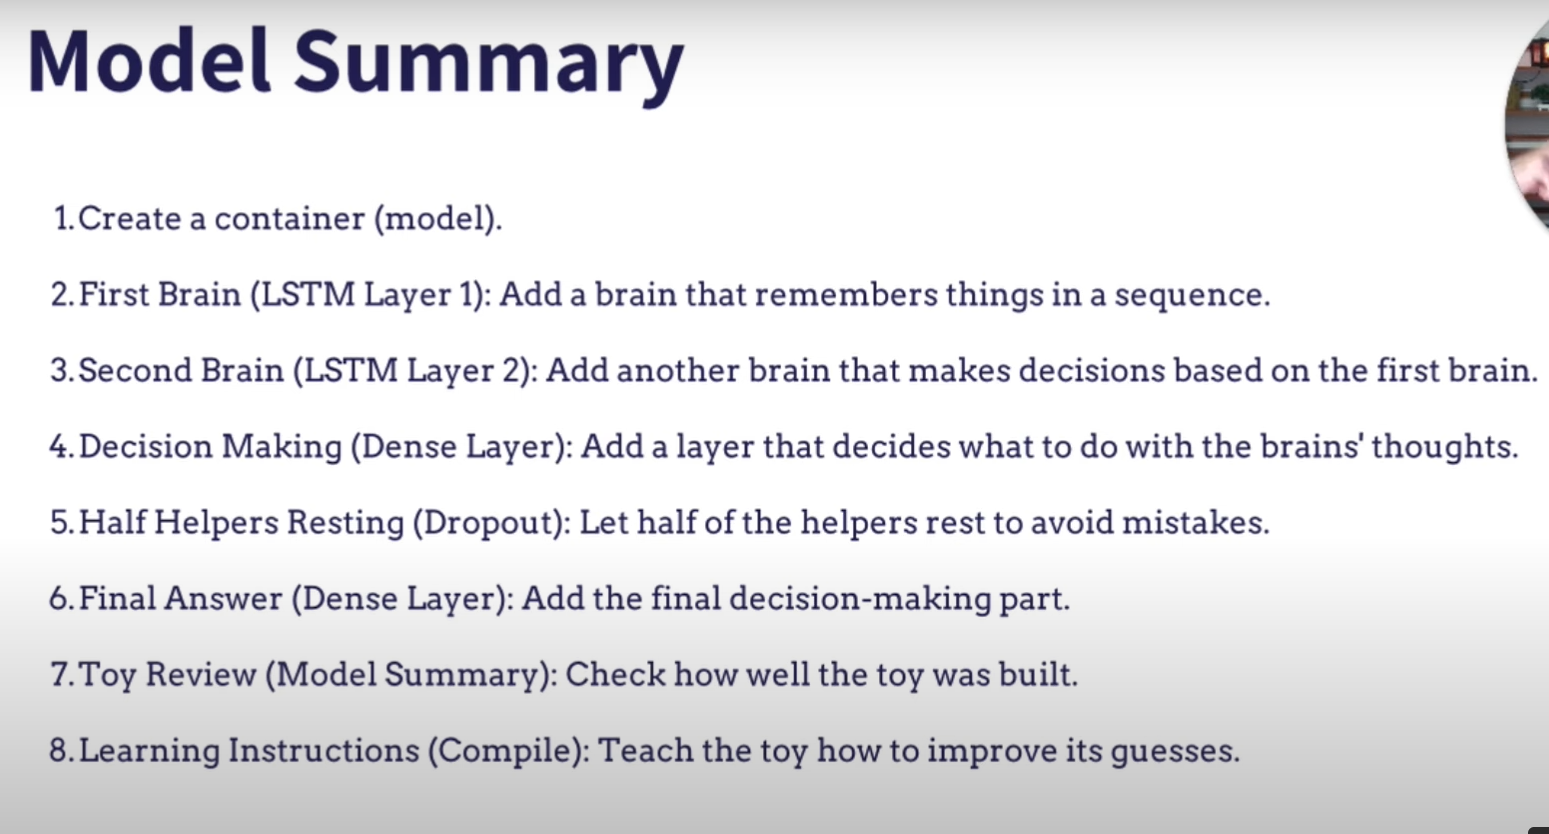

In [89]:
# pip install tensorflow pandas matplotlib scikit-learn numpy seaborn

In [90]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [91]:
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [92]:
data=pd.read_csv("/content/MicrosoftStock.csv")

| Column Name | Description                                                         |
| ----------- | ------------------------------------------------------------------- |
| `Date`      | The date of the stock market record (usually in YYYY-MM-DD format). |
| `Open`      | Stock price at the start of the trading day.                        |
| `High`      | Highest price of the stock during the day.                          |
| `Low`       | Lowest price of the stock during the day.                           |
| `Close`     | Price of the stock when the market closes.                          |
| `Adj Close` | Adjusted close price (corrected for splits/dividends).              |
| `Volume`    | Total number of shares traded that day.                             |


In [93]:
data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [95]:
data.describe()

,index,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,390827.000000,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,363.586303,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,390198.000000,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,390512.500000,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,390827.000000,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,391141.500000,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,391456.000000,95.140000,96.070000,93.720000,95.010000,2.483542e+08


Data Visualized

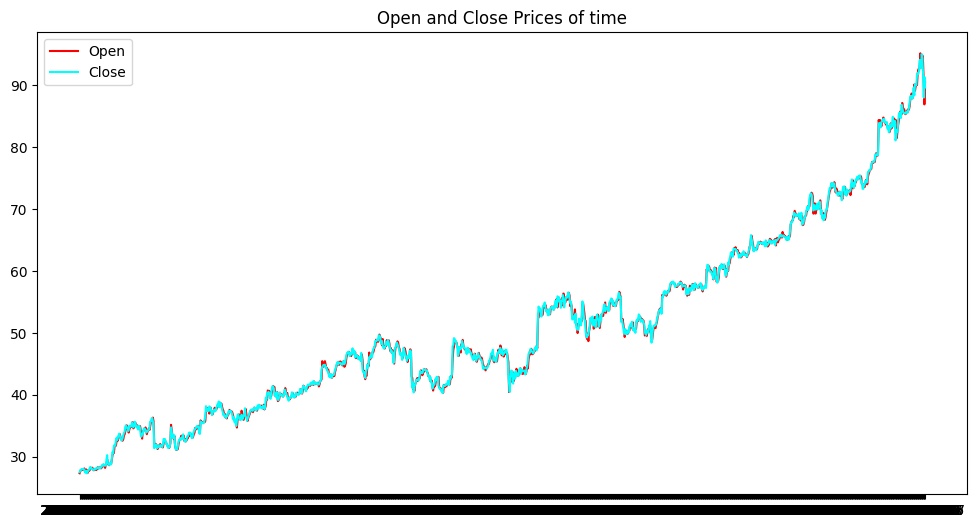

In [96]:
#Plot 1: Open and Close Prices of time

plt.figure(figsize=(12,6))
plt.plot(data['date'],data['open'],label="Open",color="red")
plt.plot(data['date'],data['close'],label="Close",color="cyan")
plt.title("Open and Close Prices of time")
# plt.xticks(rotation=5)
# plt.xlabel("Date")#- Dates are overlapping bcoz there are soo many dates
# plt.ylabel("Price")
plt.legend()
plt.show()



 What the Graph Shows:


> 🔺 Red Line: Open Prices
This represents the price at which Microsoft stock started trading each day.

Plotted along the y-axis (Price) with respect to time (x-axis).

The red color lets us track where the market opened daily.


> 🔹 Cyan Line: Close Prices
This shows the price at which the stock closed for each day.

Also plotted against time — so you can compare the open vs. close prices.Add blockquote








---


Interpretation:

*   The open and close prices are quite close, indicating low intraday volatility (stock didn’t fluctuate a lot during the day).

*   The stock seems to be steadily climbing upward, especially toward the right of the chart (recent years).

*   Occasional sharp dips can be market corrections or news impacts.





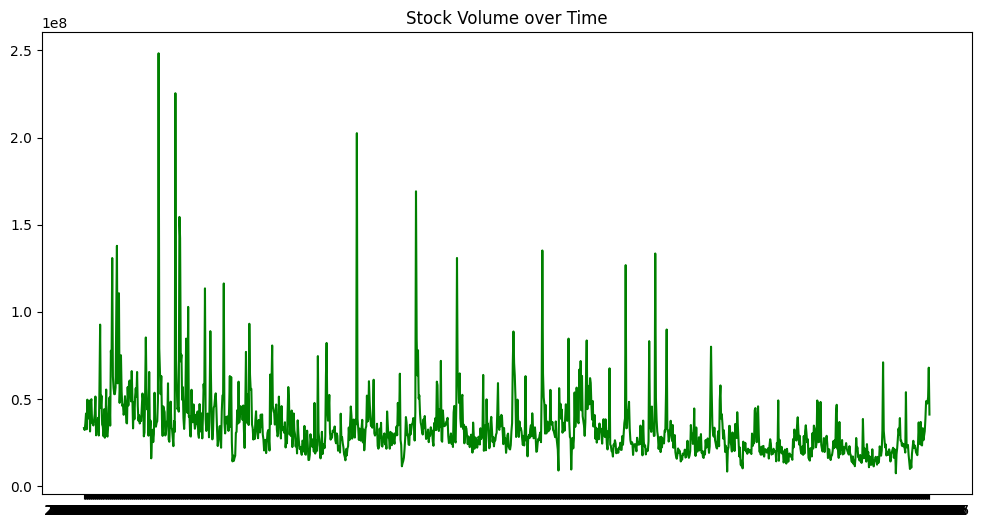

In [97]:
#Plot 2: Trading Volume
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['volume'],label="Volume",color="green")#Represents the number of shares traded on each date (volume column).
plt.title("Stock Volume over Time")
# plt.xlabel("Date")#: dates will overlap as there are many dates
# plt.ylabel("Volume")
# plt.legend()
plt.show()

In [98]:
#Removing non-numeric data
numeric_data=data.select_dtypes(include=["int64","float64"])

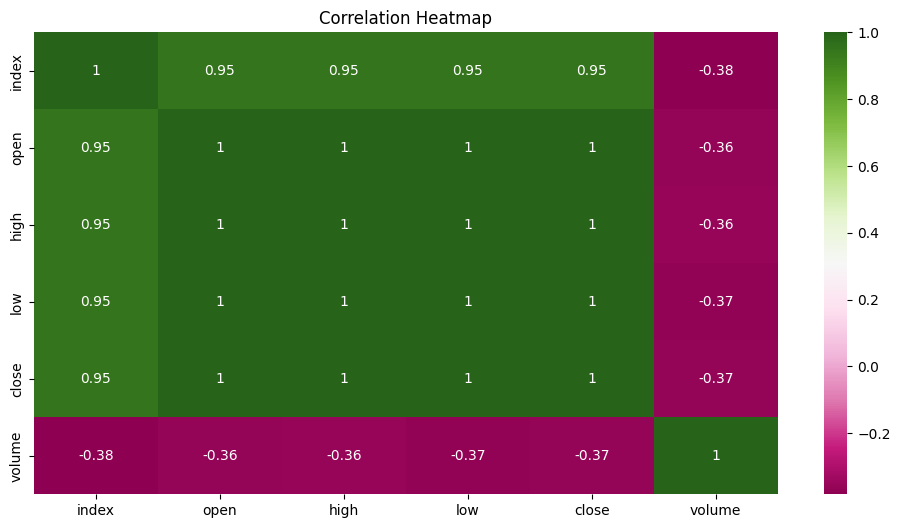

In [99]:
#Plot 3- Check for the coorelation between features
plt.figure(figsize=(12,6))
sns.heatmap(numeric_data.corr(),annot=True,cmap="PiYG")
plt.title("Correlation Heatmap")
plt.show()

Two things are said to be correlated if they change together in a predictable way.



> Example in Stock Prices:


If Microsoft’s open price goes up ⬆️, and the close price also usually goes up ⬆️, we say they are positively correlated.

If one goes up and the other goes down, they are negatively correlated.

If they don’t seem to affect each other at all, they’re not correlated.



> Correlation Coefficient


| Correlation Value | Meaning                                                          |
| ----------------- | ---------------------------------------------------------------- |
| `+1`              | Strong positive correlation (they go up/down together perfectly) |
| `0`               | No correlation (they don't affect each other)                    |
| `-1`              | Strong negative correlation (one goes up, the other goes down)   |




---

| Feature Pair                     | Correlation        | Meaning                                                                                                                                  |
| -------------------------------- | ------------------ | ---------------------------------------------------------------------------------------------------------------------------------------- |
| `open` vs `close`, `high`, `low` | `≈ 1`              | Perfect positive correlation. Makes sense because they are price values from the same day.                                               |
| `index` vs other price columns   | `≈ 0.95`           | Strong positive correlation — probably because the `index` just counts the time steps (i.e., prices go up with time).                    |
| `volume` vs everything           | `≈ -0.36 to -0.38` | Slight **negative** correlation — higher trading volume tends to occur when prices **drop**, possibly during market panic or correction. |


In [100]:
#Converting the data into date time then creates a date filter
data["date"]=pd.to_datetime(data["date"])

In [101]:
prediction = data.loc[
    (data["date"] > datetime(2013, 1, 1))
    & (data["date"] < datetime(2018, 1, 1))
]


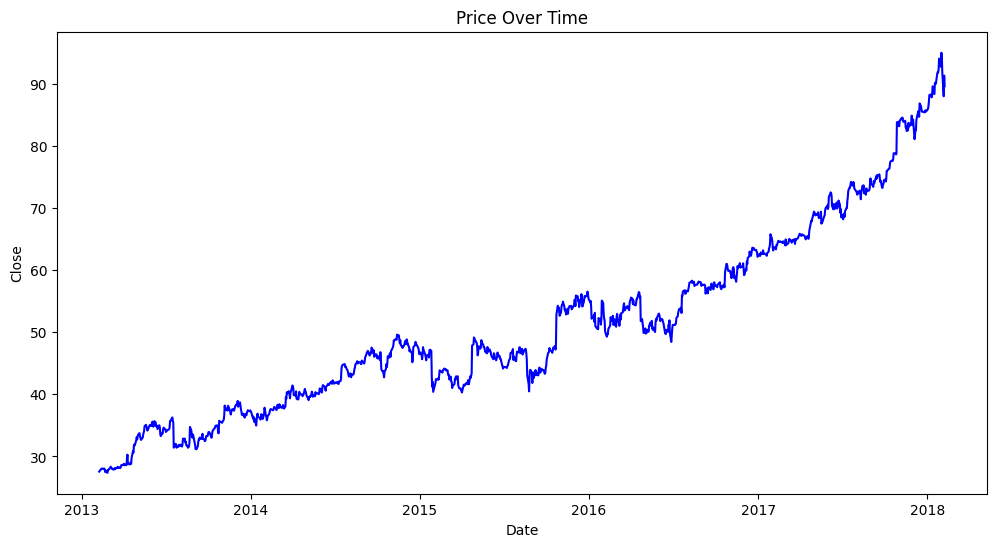

In [102]:
#Plot 4: Price over Time
plt.figure(figsize=(12,6))
plt.plot(data["date"],data["close"],color="blue")
plt.title("Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

The LSTM Model (Sequential)

In [103]:
stock_close=data.filter(["close"])
dataset=stock_close.values #convert to numpy array
training_data_len=int(np.ceil(len(dataset)*0.95))

In [104]:
#Prepocessing Stages
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)

In [105]:
training_data= scaled_data[:training_data_len]#95 percent of all data

In [106]:
X_train,y_train=[],[]

In [107]:
#Create a sliding Window for stocks (60 days)
for i in range(60,len(training_data)):
  X_train.append(training_data[i-60:i,0])
  y_train.append(training_data[i,0])

#soo here i in 60 range starts from 60
# so when i-60 is done it means its pointing at the first value 60-60=0, then 0 till i means 0 to 60.
# In NumPy, training_data[i-60:i, 0] is selecting:

# i-60:i → rows from i-60 up to (but not including) i

# 0 → the first column of the array

on skip the , 0, you'd be slicing a 2D array — and then X_train would become a 3D array, which messes up most ML models like LSTM or simple regressors expecting (samples, features).

The , 0 keeps it flat — just the 1D array of values you want to train on.

In [108]:
X_train,y_train=np.array(X_train),np.array(y_train)
#arrays bcoz tensorflow remembers arrays better

In [109]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [110]:
#Built the Model
model= keras.models.Sequential()

In [111]:
#First Layer
model.add(keras.layers.LSTM(64,return_sequences=True,input_shape=(X_train.shape[1],1)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [112]:
#Second Layer
model.add(keras.layers.LSTM(64,return_sequences=False))

In [113]:
#Third Layer
model.add(keras.layers.Dense(128,activation="relu"))

In [114]:
#Fourth layer
model.add(keras.layers.Dropout(0.5))

In [115]:
#Final Output Layer
model.add(keras.layers.Dense(1))

In [116]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model.compile(optimizer="adam",loss="mae",metrics=[keras.metrics.RootMeanSquaredError()])

In [119]:
training=model.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.3786 - root_mean_squared_error: 0.4950
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.1415 - root_mean_squared_error: 0.1923
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.1280 - root_mean_squared_error: 0.1701
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.1145 - root_mean_squared_error: 0.1557
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.1265 - root_mean_squared_error: 0.1725
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.1090 - root_mean_squared_error: 0.1511
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.1042 - root_mean_squared_error: 0.1378
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.1126 - root_mean_squared_error: 0.1512
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.1025 - root_mean_squared_error: 0.1371
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.1056 - root_mean_squared_error: 0.1406

In [120]:
training_data=scaled_data[training_data_len-60:]
X_test,y_test=[],dataset[training_data_len:]


In [121]:
for i in range(60,len(training_data)):
  X_test.append(training_data[i-60:i,0])

In [122]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [124]:
#Making Predictions
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions) #downscaling

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step


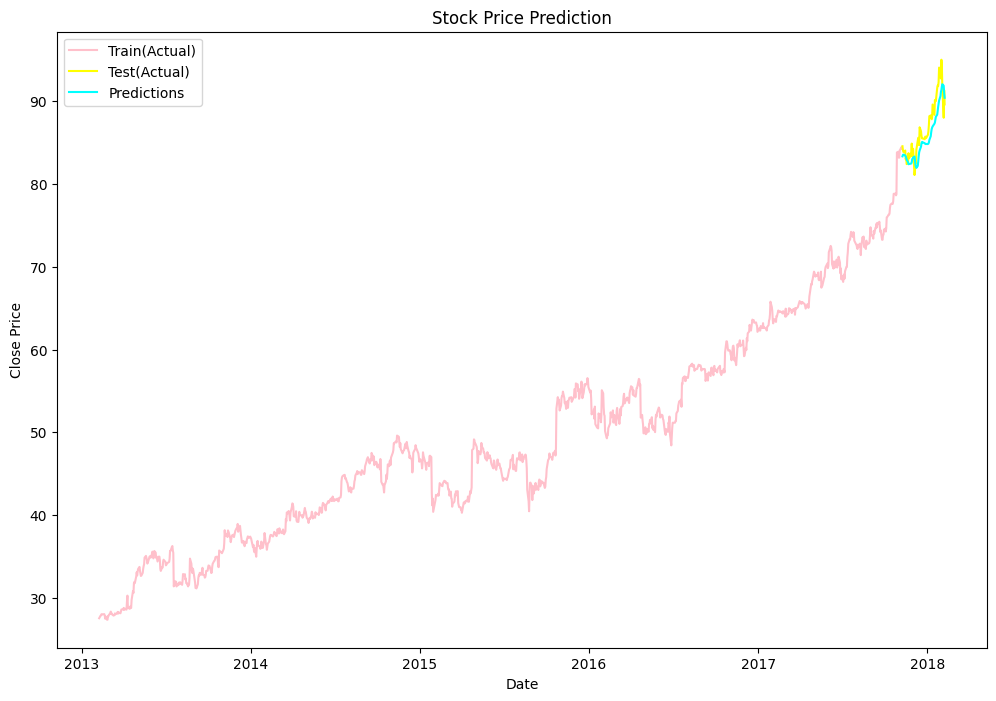

In [126]:
#Plotting Data
train=data[:training_data_len]

test=data[training_data_len:]
test=test.copy()

test["Predictions"]=predictions

plt.figure(figsize=(12,8))
plt.plot(train['date'],train["close"],label="Train(Actual)",color='pink')
plt.plot(test["date"],test["close"],label="Test(Actual)",color="yellow")
plt.plot(test["date"],test["Predictions"],label="Predictions",color="cyan")

plt.title("Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

visualizing how well LSTM model predicted Microsoft’s stock closing price over time.

Axes:


*   X-axis = Date (from 2013 to early 2018)
*   Y-axis = Close Price (stock closing price per day)



| Color     | Line            | What It Means                                           |
| --------- | --------------- | ------------------------------------------------------- |
| 🩷 Pink   | `Train(Actual)` | Real closing prices on which the model was trained      |
| 💛 Yellow | `Test(Actual)`  | Real closing prices the model has **never seen** before |
| 🩵 Cyan   | `Predictions`   | The model’s predicted prices for that unseen test data  |


The cyan predictions are pretty close to the yellow actuals, especially given the noise in financial data!

This means model has learned the pattern well and is generalizing decently.


In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Extract actual and predicted values
actual = test["close"].values
predicted = test["Predictions"].values

# Calculate metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

# Print the results
print("📊 Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"MSE  (Mean Squared Error):  {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Model Evaluation Metrics:
MAE  (Mean Absolute Error): 1.5428
MSE  (Mean Squared Error):  3.4949
RMSE (Root Mean Squared Error): 1.8695
R² Score: 0.7196


In [128]:
# Baseline: use previous day's price as the prediction
baseline_preds = test["close"].shift(1).dropna()
baseline_actual = test["close"].iloc[1:]

# Baseline RMSE
from sklearn.metrics import mean_squared_error
baseline_rmse = np.sqrt(mean_squared_error(baseline_actual, baseline_preds))
print(f"Baseline RMSE: {baseline_rmse:.4f}")


Baseline RMSE: 1.1956


Actual vs. Predicted Scatter Plot

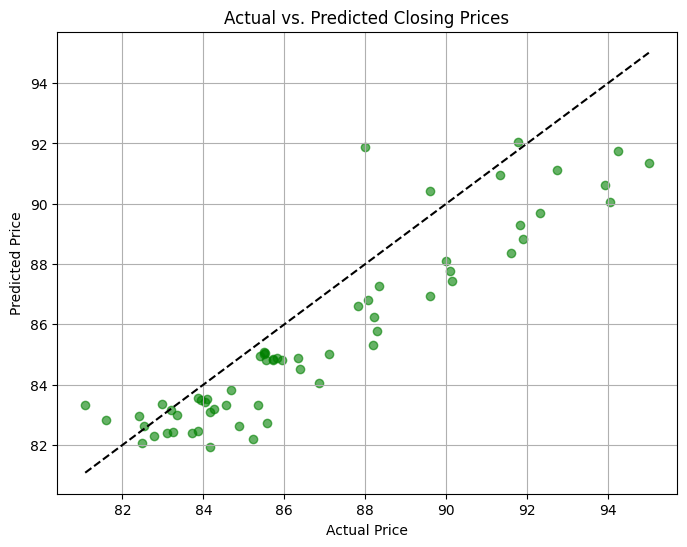

In [129]:
plt.figure(figsize=(8,6))
plt.scatter(test['close'], test['Predictions'], color='green', alpha=0.6)
plt.plot([test['close'].min(), test['close'].max()],
         [test['close'].min(), test['close'].max()],
         color='black', linestyle='--')  # perfect prediction line
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()
